# 👩🏻‍💻 Unit 4: Natural Language Processing (NLP) In Python
- Lesson 4.1 – Import and Explore a Dataset
- Lesson 4.2 – Perform Text Data Cleaning and Generate Word Cloud Visualization
- Lesson 4.3 – Perform Text Encoding/Tokenization
- Lesson 4.4 – Text Data Padding
- Lesson 4.5 – Develop a Pipeline for Text Encoding/Tokenization and Padding
- Lesson 4.6 – Split the Data into Training, Testing, and Validation
- Lesson 4.7 – Understand the Intuition behind Long Short-Term Memory (LSTM) Networks
- Lesson 4.8 – Train a Long Short-Term Memory (LSTM) Neural Network
- Lesson 4.9 – Confusion Matrix and Classification Models KPIs
- Lesson 4.10 – Evaluate Trained ML Classifier Model Performance
- Lesson 4.11 – Perform Sentiment Analysis Using Pre-Trained Language Model

---

### 🎬 Lesson 4.1: Import and Explore a Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
import pandas as pd

In [3]:
df = pd.read_csv(r"./data/unit4/financial_news.csv")
df.head(10)

,Text,Label
0,Amazon to create 500 new jobs in Mississippi a...,positive
1,"GE's stock rises 1% premarket, set to trade ab...",positive
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative
4,3 Top-Performing Mutual Funds to Consider for ...,neutral
5,XAU/USD Bullish ABC Pattern Aims at $1500 Resi...,positive
6,CA$10.60 - That's What Analysts Think Vecima N...,neutral
7,The Fed moved to bolster a new small-business ...,neutral
8,Democrat's New Taxes Wouldn't Hit Just Billion...,neutral
9,"Is ABM Industries, Inc. (ABM) A Good Stock To ...",neutral


In [4]:
df.Label.value_counts()

Label
neutral     6179
positive    1927
negative    1443
Name: count, dtype: int64

In [5]:
for i in range(5):
    print('Data: {}'.format(df.iloc[i]['Text']))
    print('Label: {}'.format(df.iloc[i]['Label']))     
    print('\n')

Data: Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center
Label: positive


Data: GE's stock rises 1% premarket, set to trade above $13 for 1st time in regular-session hours since October 2018
Label: positive


Data: CN Rail Strike Begins, Threatening Canada Oil, Grain Shipments
Label: negative


Data: Hong Kong Airlines to cut 400 jobs, ask employees to take unpaid leave: SCMP
Label: negative


Data: 3 Top-Performing Mutual Funds to Consider for Your Retirement Portfolio- February 07, 2020
Label: neutral




**PRACTICE OPPORTUNITY:**
- Display the last 10 samples in the Pandas DataFrame df
- Perform a sanity check by displaying the last 10 rows data along with the corresponding label

In [6]:
df.tail(10)

,Text,Label
9539,Japan Recession Risks Prompt Forecasts of 2020...,negative
9540,Novo Nordisk beats analysts estimates in Q2 2022,positive
9541,Apple's iPhone sales accounted for 47.3 % of t...,neutral
9542,Alibaba lays off nearly 10000 employees to cut...,positive
9543,Here's what happened to the stock market on Tu...,neutral
9544,Stock Market Update: Boeing turns positive,positive
9545,33 genius travel hacks to upgrade your holiday...,neutral
9546,Hong Kong stocks increased 4% as China relaxes...,positive
9547,Novo Nordisk stock increased by 2% in today's ...,positive
9548,Amazon stock lost half its value this year as ...,negative


In [7]:
for i in range(10, 0, -1):
    print(f"Data: {df.iloc[len(df)-i].Text}")
    print(f"Label: {df.iloc[len(df)-i].Label}")

Data: Japan Recession Risks Prompt Forecasts of 2020 Contraction
Label: negative
Data: Novo Nordisk beats analysts estimates in Q2 2022
Label: positive
Data: Apple's iPhone sales accounted for 47.3 % of the company's overall revenue in Q1 2022
Label: neutral
Data: Alibaba lays off nearly 10000 employees to cut expenses
Label: positive
Data: Here's what happened to the stock market on Tuesday
Label: neutral
Data: Stock Market Update: Boeing turns positive
Label: positive
Data: 33 genius travel hacks to upgrade your holiday trips https://t.co/ZVckjmpdVE
Label: neutral
Data: Hong Kong stocks increased 4% as China relaxes virus rules
Label: positive
Data: Novo Nordisk stock increased by 2% in today's trading session
Label: positive
Data: Amazon stock lost half its value this year as tech stocks got crushed and recession fears grew
Label: negative


---

### 🎬 Lesson 4.2: Perform Text Data Cleaning and Generate Word Cloud Visualization

### Create a pipeline to clean up text data and generate word cloud visualization

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huiligu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import re

In [10]:
# Let's define a function that performs data cleaning by removing stop words and non-alphanumeric characters  
# Note that alphanumeric characters (letters and digits) in English includes letters from A to Z and Arabic numerals 0 to 9

# The function takes in a string of text, removes non-alphanumeric characters, converts text to lower case, 
# removes stop words and returns cleaned text in a String format

def clean_text(text):

    # Let's remove non-alphanumeric charachters 
    # The re.sub() returns a string where all matching occurrences of the given pattern are replaced by the provided string
    # This is a regular expression to remove any non-alphanumeric from a string variable called text
    # a-zA-Z0-9 means alphanumeric characters (letters and digits) 
    # a-z and A-Z specify all letters and 0-9 specifies all digits
    # ^ means negated character set
    # Note that "r" creates a raw string that do not process escape sequences (\n)

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Convert text to lower case
    text = text.lower()

    # Remove stop words 
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

In [11]:
clean_text('WELCOME to this practical skills module!!')
df['Cleaned Text'] = df['Text'].apply(clean_text)
df.head(3)

,Text,Label,Cleaned Text
0,Amazon to create 500 new jobs in Mississippi a...,positive,amazon create 500 new jobs mississippi builds ...
1,"GE's stock rises 1% premarket, set to trade ab...",positive,ges stock rises 1 premarket set trade 13 1st t...
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative,cn rail strike begins threatening canada oil g...


!pip install wordcloud

In [12]:
# Let's define a function that receives a string of text and generates word cloud visualization 
# The Python Function also removes custom stop words such as politics-related words before generating the word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(text):
    
    # Add custom stop words
    custom_stopwords = {"http", "china", "us", "united states", "political", "politics","stock","stocks", "trump"}

    # Update the default stop words included in the WordCloud library with our custom stop words
    stopwords = set(STOPWORDS)
    stopwords.update(custom_stopwords)

    # Generate the WordCloud object
    wordcloud = WordCloud(width = 1600, height = 800, stopwords = stopwords, min_font_size = 10).generate(text)

    # Display the WordCloud 
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

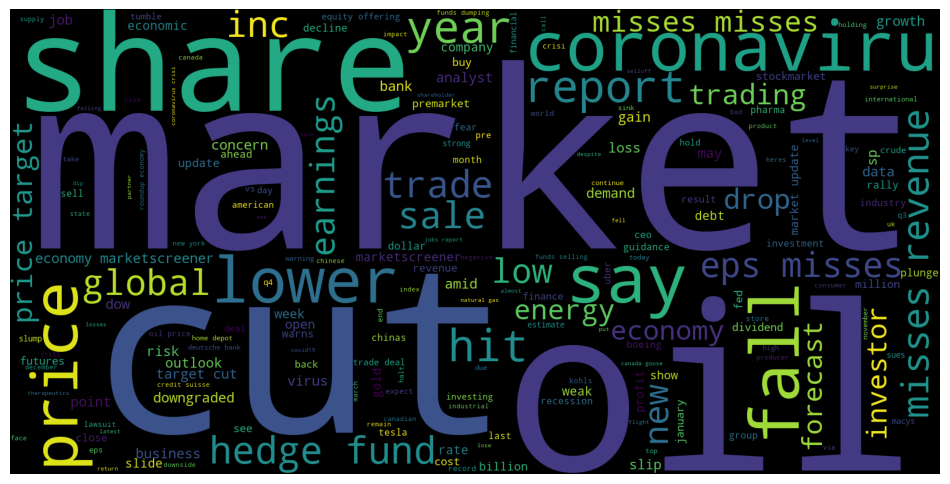

In [13]:
generate_word_cloud(" ".join(df[df['Label'] == 'negative']['Cleaned Text']))

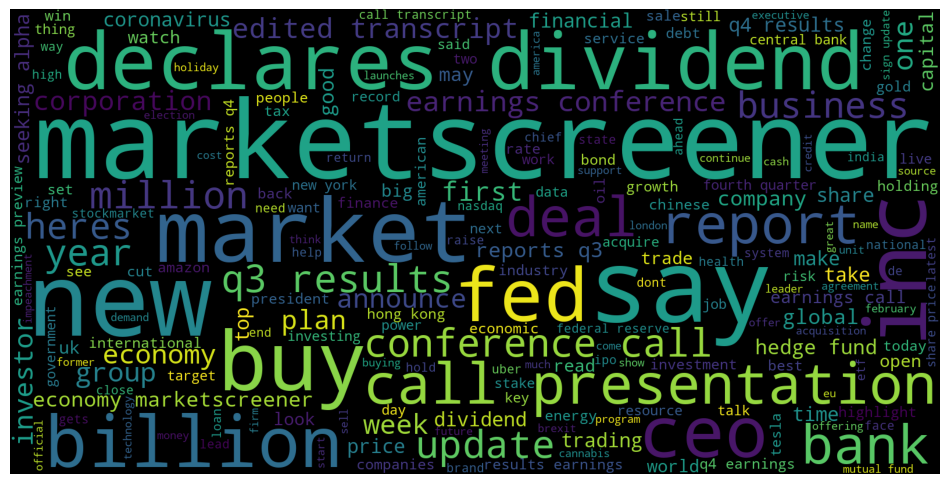

In [14]:
generate_word_cloud(" ".join(df[df['Label'] == 'neutral']['Cleaned Text']))

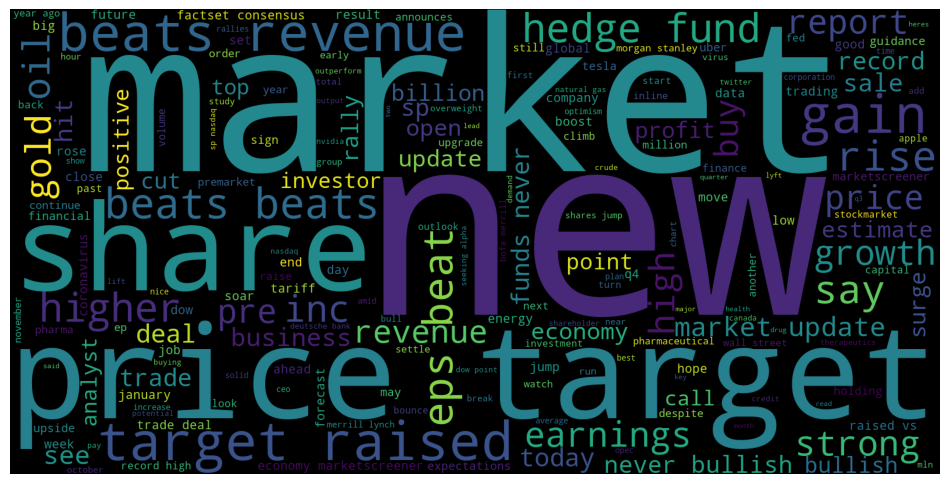

In [15]:
generate_word_cloud(" ".join(df[df['Label'] == 'positive']['Cleaned Text']))

---

### 🎬 Lesson 4.3: Perform Text Encoding/Tokenization

### Text Encoding/Tokenization
- **convert text data into numbers** that can be processed by computers
- **BERT(Bidirectional Encoder Representations from Transformers)** is a family of language models published by Google in 2018
- BERT is widely based on the widely popular transformer architecture which is an artificial neural network model that uses self-attention mechanisms to capture long-range dependencies in the input sequence, which allows it to capture contextual information.
- FinBert is a language model based on Bert that can perform NLP tasks in the financial domain.
- Link to FinBERT paper: https://arxiv.org/abs/1908.10063

! pip install transformers

In [16]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

| Model | Parameter Scale | Training Data | Features | Usage Frequency |
|-------|-----------------|---------------|----------|-----------------|
| **BloombergGPT** | 50B | 363B tokens | Most comprehensive and professional | ⭐⭐⭐⭐⭐ |
| **FinBERT (yiyanghkust)** | 110M | Financial news | Specialized for sentiment analysis | ⭐⭐⭐⭐ |
| **GPT-3.5/4 Finetuned** | 175B+ | General + Financial | High flexibility | ⭐⭐⭐⭐ |
| **ProsusAI/finbert** | 110M | Relatively small | Basic financial understanding | ⭐⭐⭐ |
| **FinGPT** | Various scales | Open-source financial data | Open-source alternative | ⭐⭐⭐ |

In [17]:
news_1 = "Hong Kong stocks increased 4% as China relaxes virus rules"
news_2 = "Novo Nordisk stock increased by 2% in today's trading session"
news_3 = "Amazon stock lost half its value this year as tech stocks got crushed and recession fears grew"

In [18]:
# View an encoded version of a sample dataset #1
encoded_news_1 = tokenizer.encode(news_1)
print(encoded_news_1)

[101, 4291, 4290, 15768, 3445, 1018, 1003, 2004, 2859, 9483, 2229, 7865, 3513, 102]


In [19]:
# View an encoded version of a sample dataset #2
encoded_news_2 = tokenizer.encode(news_2)
print(encoded_news_2)

[101, 24576, 13926, 20573, 4518, 3445, 2011, 1016, 1003, 1999, 2651, 1005, 1055, 6202, 5219, 102]


In [20]:
# View an encoded version of a sample dataset #3
encoded_news_3 = tokenizer.encode(news_3)
print(encoded_news_3)

[101, 9733, 4518, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


**PRACTICE OPPORTUNITY:**
- Encode/Tokenize the following two statements:
    - "JPMorgan Sees 70% Upside for These 2 Auto Stocks in 2023"
    - "JPMorgan, Goldman Say Stocks Recovery Won’t Be Easy in 2023"

In [21]:
news_4 = "JPMorgan Sees 70% Upside for These 2 Auto Stocks in 2023"
news_5 = "JPMorgan, Goldman Say Stocks Recovery Won’t Be Easy in 2023"
encoded_news_4 = tokenizer.encode(news_4)
encoded_news_5 = tokenizer.encode(news_5)

---

### 🎬 Lesson 4.4: Text Data Padding

### Text Padding
- it is the process of adding characters to a text input in order to make all inputs have the same length.

In [22]:
import torch
from torch.nn.utils.rnn import pad_sequence
padded_sequence = pad_sequence([torch.tensor(encoded_news_1), torch.tensor(encoded_news_2), \
                                torch.tensor(encoded_news_3)], \
                               # output shape [batch_size, max_length]
                               batch_first = True, \
                               # fill with 0
                               padding_value = 0).numpy()
padded_sequence

array([[  101,  4291,  4290, 15768,  3445,  1018,  1003,  2004,  2859,
         9483,  2229,  7865,  3513,   102,     0,     0,     0,     0,
            0],
       [  101, 24576, 13926, 20573,  4518,  3445,  2011,  1016,  1003,
         1999,  2651,  1005,  1055,  6202,  5219,   102,     0,     0,
            0],
       [  101,  9733,  4518,  2439,  2431,  2049,  3643,  2023,  2095,
         2004,  6627, 15768,  2288, 10560,  1998, 19396, 10069,  3473,
          102]])

**❇️ PRACTICE OPPORTUNITY:**
- Perform tokenization and padding to the following text data:
    - "Emerging market stocks extended their lead over US shares in the early days of the new year, with the equity benchmark rising to a six-month high against the S&P 500 Index"
    - "Cape Town-based Naspers, founded more than 100 years ago, bought its 33% stake in Tencent in 2004 for just \\$231 million. That shareholding has since soared almost 50,000% in value to today’s \$114 billion"
    - "Amazon lost half its value this year as tech stocks got crushed and recession fears grew"

In [23]:
text_input_1 = "Emerging market stocks extended their lead over US shares in the early days of \
the new year, with the equity benchmark rising to a six-month high against the S&P 500 Index"
text_input_2 = "Cape Town-based Naspers, founded more than 100 years ago, bought its 33% stake \
in Tencent in 2004 for just $231 million. That shareholding has since soared almost 50,000% in value to today’s $114 billion"
text_input_3 = "Amazon lost half its value this year as tech stocks got crushed and recession fears grew"

In [24]:
encoded_text_1 = tokenizer.encode(text_input_1)
encoded_text_2 = tokenizer.encode(text_input_2)
encoded_text_3 = tokenizer.encode(text_input_3)
text_inputs = [torch.tensor(encoded_text_1), torch.tensor(encoded_text_2), torch.tensor(encoded_text_3)]
padded_sequence_2 = pad_sequence(text_inputs, batch_first=True, padding_value=0).numpy()
padded_sequence_2

array([[  101,  8361,  3006, 15768,  3668,  2037,  2599,  2058,  2149,
         6661,  1999,  1996,  2220,  2420,  1997,  1996,  2047,  2095,
         1010,  2007,  1996, 10067,  6847, 10665,  4803,  2000,  1037,
         2416,  1011,  3204,  2152,  2114,  1996,  1055,  1004,  1052,
         3156,  5950,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  101,  4880,  2237,  1011,  2241, 17235,  7347,  1010,  2631,
         2062,  2084,  2531,  2086,  3283,  1010,  4149,  2049,  3943,
         1003,  8406,  1999,  2702, 13013,  1999,  2432,  2005,  2074,
         1002, 20304,  2454,  1012,  2008,  3745, 23410,  2038,  2144,
        29127,  2471,  2753,  1010,  2199,  1003,  1999,  3643,  2000,
         2651,  1521,  1055,  1002, 12457,  4551,   102],
       [  101,  9733,  2439,  2431,  2049,  3643,  2023,  2095,  2004,
         6627, 15768,  2288, 10560,  1998, 19396, 10069,  3473,   102,
            0,     0,     0,    

---

### 🎬 Lesson 4.5: Develop a Pipeline for Text Encoding/Tokenization and Padding

In [25]:
# Let's define a Python Function that performs tokenization and padding to text data in DataFrames
def tokenization_padding(df):

    # Use Python List Comprehension to tokenize every row in the Pandas DataFrame "df" 
    df['Encoded Text'] = [tokenizer.encode(news) for news in df['Cleaned Text'].tolist()]

    # Convert data into tensors using List Comprehension and then perform Zero-Padding to ensure that data has the same length
    encoded_news_tensor = [torch.tensor(encoded_news) for encoded_news in df['Encoded Text'].tolist()]
    padded_sequence = pad_sequence(encoded_news_tensor, batch_first = True, padding_value = 0).numpy()

    return padded_sequence

In [26]:
X = tokenization_padding(df)
X

array([[  101,  9733,  3443, ...,     0,     0,     0],
       [  101, 16216,  2015, ...,     0,     0,     0],
       [  101, 27166,  4334, ...,     0,     0,     0],
       ...,
       [  101,  4291,  4290, ...,     0,     0,     0],
       [  101, 24576, 13926, ...,     0,     0,     0],
       [  101,  9733,  4518, ...,     0,     0,     0]])

In [27]:
# Let's encode the label (target) column as follows:  
    # positive = 0
    # negative = 1
    # neutral  = 2
df['Encoded Label'] = df['Label'].replace('positive', 0).replace('negative', 1).replace('neutral', 2)

In [28]:
df.head(3)

,Text,Label,Cleaned Text,Encoded Text,Encoded Label
0,Amazon to create 500 new jobs in Mississippi a...,positive,amazon create 500 new jobs mississippi builds ...,"[101, 9733, 3443, 3156, 2047, 5841, 5900, 1647...",0
1,"GE's stock rises 1% premarket, set to trade ab...",positive,ges stock rises 1 premarket set trade 13 1st t...,"[101, 16216, 2015, 4518, 9466, 1015, 26563, 17...",0
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative,cn rail strike begins threatening canada oil g...,"[101, 27166, 4334, 4894, 4269, 8701, 2710, 351...",1


---

### 🎬 Lesson 4.6: Split the Data into Training, Testing, and Validation

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

y = df['Encoded Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle = False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(5729, 61)
(1910, 61)
(1910, 61)
(5729,)
(1910,)
(1910,)


**❇️ PRACTICE OPPORTUNITY:** 
- Using Scikit-Learn library, split the data into 15% for testing, 15% for validation and 70% for training while enabling shuffling. 
- How many samples are present in the training, validation and testing subsets?

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(6684, 61) (1432, 61) (1433, 61)
(6684,) (1432,) (1433,)


---

### 🎬 Lesson 4.7: Understand the Intuition behind Long Short-Term Memory (LSTM) Networks

### Feed Forward ANN vs. RNN (Recurrent Neural Network)
- FeedForward ANN mapped a fixed size input to a fixed size output.
- FeedForward ANNs do not consider temporal information and do not have a memory.
- RNNs are a type of ANNs that are designed to take temporal information into consideration by having a memory or internal state (feedback).

### RNN
- RNN contains a temporal loop in which the hidden layer not only gives an output, it also feeds itself as well. This will add an additional dimension which is time.
- Xt -> ht -> Ot => Xt+1, ht -> ht+1 -> Ot+1

### LSTM (Long short-term memory)
- LSTM networks are type of RNN that are designed to remember long-term dependencies by default
- LSTM can remember and recall a prolonged period of time
- LSTM contains gates that can allow of block information from passing by.
    - **Forget gate:** σ(W_f · [h_{t-1}, x_t] + b_f)
    - **Input gate:** i_t = σ(W_i · [h_{t-1}, x_t] + b_i) \
                        C̃_t = tanh(W_C · [h_{t-1}, x_t] + b_C)
    - **Output gate:** o_t = σ(W_o · [h_{t-1}, x_t] + b_o) \
                        h_t = o_t * tanh(C_t)

### Difference between sigmoid and tanh
| Property | Sigmoid (σ) | Tanh |
|----------|-------------|------|
| **Output Range** | (0, 1) | (-1, 1) |
| **Center Symmetric** | No (biased) | Yes (zero-centered) |
| **Gradient Range** | (0, 0.25] | (0, 1] |
| **Main Purpose** | Gating (switch) | Value generation (content) |

---

### 🎬 Lesson 4.8: Train a Long Short-Term Memory (LSTM) Neural Network

In [32]:
import torch.nn as nn
class LstmCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.w_f = nn.Linear((input_size + hidden_size), hidden_size)
        self.b_f = nn.Parameter(torch.zeros(hidden_size))
        
        self.w_i = nn.Linear((input_size + hidden_size), hidden_size)
        self.b_i = nn.Parameter(torch.zeros(hidden_size))
        
        self.w_c = nn.Linear((input_size + hidden_size), hidden_size)
        self.b_c = nn.Parameter(torch.zeros(hidden_size))
        
        self.w_o = nn.Linear((input_size + hidden_size), hidden_size)
        self.b_o = nn.Parameter(torch.zeros(hidden_size))

    def forward(self, x, state):
        h_prev, c_prev = state
        combined = torch.cat([x, h_prev], dim=1)
        
        # forget_gate using sigmoid: decide which old word to remember 
        # ex: "i love playing football", x="football", f_t=[0.9, 0.1, 0.8, ...]
        # remember "i, playing"; forget "love"
        f_t = torch.sigmoid(self.w_f(combined) + self.b_f)
        
        # input_gate:
        # inputs using sigmoid: decide which new word to remember
        # candidates using tanh: generate new candidate words
        # ex: x="football", i_t = [0.7, 0.9, 0.2, ...], c_t = [new football features] 
        # i_t * c_t indicates new words to remember
        i_t = torch.sigmoid(self.w_i(combined) + self.b_i)
        # c~ 
        c_tilde = torch.tanh(self.w_c(combined) + self.b_c)

        # update the memory cell
        c_t = f_t * c_prev + i_t * c_tilde

        # output_gate using sigmoid: decide which is the output word given h_t-1 and x_t
        o_t = torch.sigmoid(self.w_o(combined) + self.b_o)

        # tanh compress the memory cell to avoid information explosion, o_t acts like the information filter 
        h_t = o_t * torch.tanh(c_t)

        # h_t represents the information to reveal - short-term output
        # c_t represents the whole memory - long-term memory
        return h_t, c_t

In [33]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_classes=3, dropout=0.5):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        # batch_first=True: (batch_size, seq_len, input_size)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))  # out: (batch, seq_len, hidden_dim), _ -> hn,cn can be ignored
        out = out[:, -1, :]  # (batch, hidden_dim)
        out = self.fc(out)  # (batch, num_classes)
        return out

```mermaid
flowchart TD
    A["Input Data<br>batch_size, seq_len, input_dim"] --> B["Initialize hidden state h0 and cell state c0"]
    A --> C[LSTM Layer]
    B --> C
    C --> D["LSTM Output<br>batch_size, seq_len, hidden_dim"]
    D --> E["Take output of the last time step<br>batch_size, hidden_dim"]
    E --> F[Fully Connected Layer]
    F --> G["Final Classification Result<br>batch_size, num_classes"]
```

In [34]:
def train_model(model, train_loader, val_loader, num_epochs, learning_rate, device):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    model.to(device)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, -1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_acc = 100 * correct / total
        val_acc = evaluate(model, val_loader, device)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

In [35]:
def evaluate(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            # return probability, index
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

### TensorDataset + DataLoader
- organize the data into (X, y) pairs
- automatically split into batches, shuffle, and load in parallel, making model training more convenient.

In [36]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)

X_val   = torch.tensor(X_val, dtype=torch.float32)
y_val   = torch.tensor(y_val.values, dtype=torch.long)

# X_train shape: (5729, 61) -> (5729, 1, 61)
X_train = X_train.unsqueeze(1)
X_val   = X_val.unsqueeze(1)

train_dataset = TensorDataset(X_train, y_train)
val_dataset   = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [37]:
X_train.shape

torch.Size([6684, 1, 61])

In [38]:
model = LSTMClassifier(input_dim=X_train.shape[-1], hidden_dim=128, num_layers=4, num_classes=3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=1e-3, device=device)

Epoch [1/10], Loss: 0.9065, Train Acc: 65.04%, Val Acc: 63.57%
Epoch [2/10], Loss: 0.8863, Train Acc: 65.04%, Val Acc: 63.57%
Epoch [3/10], Loss: 0.8848, Train Acc: 65.04%, Val Acc: 63.57%
Epoch [4/10], Loss: 0.8850, Train Acc: 65.04%, Val Acc: 63.57%
Epoch [5/10], Loss: 0.8859, Train Acc: 65.04%, Val Acc: 63.57%
Epoch [6/10], Loss: 0.8848, Train Acc: 65.04%, Val Acc: 63.57%
Epoch [7/10], Loss: 0.8835, Train Acc: 65.04%, Val Acc: 63.57%
Epoch [8/10], Loss: 0.8837, Train Acc: 65.04%, Val Acc: 63.57%
Epoch [9/10], Loss: 0.8850, Train Acc: 65.04%, Val Acc: 63.57%
Epoch [10/10], Loss: 0.8834, Train Acc: 65.04%, Val Acc: 63.57%


### Notice:
- as we are not using a time-series dataset (seq_len = 1), the outputs are consistent 

--- 

### 🎬 Lesson 4.9: Confusion Matrix and Classification Models KPIS

### Confusion Matrix:
| Predicted \ Actual | Actual 1 | Actual 0 |
|-------------------|----------|----------|
| Predicted 1       | TP       | FP (Type1 error)      |
| Predicted 0       | FN (Type2 error)       | TN       |

- **TP (True Positive)**
- **TN (True Negative)** 
- **FP (False Positive)** 
- **FN (False Negative)**

### Accuracy, Precision, Recall and F1-score

**Accuracy:** How many are correct predictions  
$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN}
$$

**Precision:** Among the predicted positives, how many are true positives  
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Recall:** Among the actual positives, how many are predicted positive  
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**F1-score:** Harmonic mean of Precision and Recall  
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


--- 

### 🎬 Lesson 4.10: Evaluate Trained ML Classifier Model Performance

In [39]:
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [40]:
X_test = X_test.unsqueeze(1)

In [41]:
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

In [42]:
correct = 0
total = 0
for text, labels in test_loader:
    # model(input).shape : torch.Size([32, 3])
    _, predicted = torch.max(model(text).detach(), dim=1)
    total += labels.size()[0]
    correct += (predicted == labels).sum().item()
print(f"test accuracy: {100*correct/total}%")

test accuracy: 64.31564245810056%


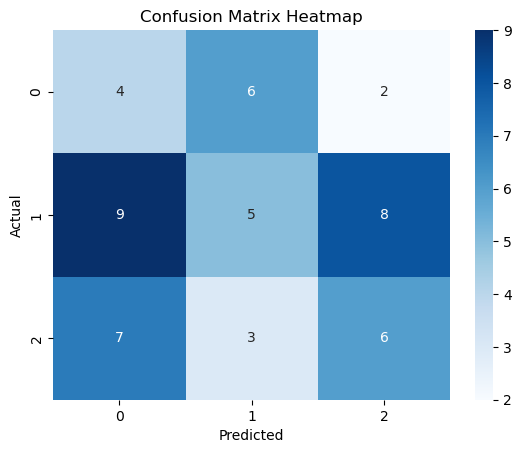

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

num_samples = 50
num_classes = 3
y_test = np.random.randint(0, num_classes, size=num_samples)
y_predict = np.random.randint(0, num_classes, size=num_samples)

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [44]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.20      0.33      0.25        12
           1       0.36      0.23      0.28        22
           2       0.38      0.38      0.38        16

    accuracy                           0.30        50
   macro avg       0.31      0.31      0.30        50
weighted avg       0.33      0.30      0.30        50



---

### 🎬 Lesson 4.11 – Perform Sentiment Analysis Using Pre-Trained Language Model

### Bert to FinBert
- **Step1: BERT model pre-training**
    - This step involves training BERT model in an unsupervised way using a massive amount of general domain text available on Wikipedia. The goal is for Bert to learn **general language features**.
- **Step2: BERT model domain-adaptation**
    - This step involves training BERT models **on a specific domain dataset such as financial dataset**. The goal is for model to become an expert in a specific domain.
- **Step3: BERT model fine-tuning**
    - The pre-trained BERT model is then fine-tuned for many NLP tasks such as sentiment analysis and text summarization. This fine-tuning process takes the pre-trained weights and **introduces an additional 1-2 layers for the specific task and further trains the model using a task-specific labeled dataset**.

In [45]:
from transformers import AutoTokenizer, pipeline
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("sentiment-analysis", model = "ProsusAI/finbert", tokenizer = tokenizer)

Device set to use mps:0


### Pipeline API Automatic handling:
- Tokenization of input text
- Forward pass through the model
- Decoding or formatting output to a readable form

In [46]:
# Let's test the pre-trained language model 
news_1 = "Finnish media group Talentum has issued a profit warning"
news_2 = "Amazon stock increased by 2%"
print(sentiment_pipeline(news_1))
print(sentiment_pipeline(news_2))

[{'label': 'negative', 'score': 0.9662613868713379}]
[{'label': 'positive', 'score': 0.6424018740653992}]


In [47]:
test_df = df[X_train.shape[0] + X_val.shape[0]:].copy()
test_df.head(3)

,Text,Label,Cleaned Text,Encoded Text,Encoded Label
8117,Nokia is Preparing to Come Roaring Back in the...,positive,nokia preparing come roaring back new decade,"[101, 22098, 8225, 2272, 17197, 2067, 2047, 54...",0
8118,"ICYMI: Actually, Teslas are among the *least* ...",neutral,icymi actually teslas among least stolen vehic...,"[101, 13580, 4328, 2941, 26060, 2015, 2426, 25...",2
8119,Buchanan Health Center Opens New The Villages ...,neutral,buchanan health center opens new villages loca...,"[101, 14349, 2740, 2415, 7480, 2047, 4731, 329...",2


In [48]:
test_df["pretrained_model_prediction"] = test_df.apply(lambda row: sentiment_pipeline(row['Text'])[0]['label'], axis=1)
test_df.head(3)

,Text,Label,Cleaned Text,Encoded Text,Encoded Label,pretrained_model_prediction
8117,Nokia is Preparing to Come Roaring Back in the...,positive,nokia preparing come roaring back new decade,"[101, 22098, 8225, 2272, 17197, 2067, 2047, 54...",0,positive
8118,"ICYMI: Actually, Teslas are among the *least* ...",neutral,icymi actually teslas among least stolen vehic...,"[101, 13580, 4328, 2941, 26060, 2015, 2426, 25...",2,neutral
8119,Buchanan Health Center Opens New The Villages ...,neutral,buchanan health center opens new villages loca...,"[101, 14349, 2740, 2415, 7480, 2047, 4731, 329...",2,neutral


In [49]:
from sklearn.metrics import accuracy_score
print("Test Accuracy: {:.2f}%".format(accuracy_score(test_df['Label'], test_df['pretrained_model_prediction']) * 100))

Test Accuracy: 71.51%


---

### 🥳 End of Unit 4!